### Student Information
Name: 陳薇如

Student ID: 110003816

GitHub ID: abcd23698741
https://github.com/abcd23698741/DM2022-Lab1-Master

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# Section2

### 2.0 Data Description
> Source: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#
> This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015. 
It contains sentences labelled with positive or negative sentiment.

#### Format
> sentence score

#### Details
> Score is either 1 (for positive) or 0 (for negative) The sentences come from three different websites/fields.
> For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.
>- imdb.com
>- amazon.com
>- yelp.com

### 2.1 Import the dataset

#### Main Steps
1. Donwload the data from repository, and save then under /data foler.
2. Examine the files, can find out that the data format: <**Sentence + label**> seperated by tab and \n.
3. With this primary acknowledge, split lines into sentence and label when reading file, make the process more efficently.
4. Save the result into pandas dataframe **df** for further application.

#### Others:
- Trimming the leading and trailing whitespaces of sentance
- Transform the data type of label from string into integral

#### Output:
- A dataframe with size of (3000,3), the len is consistant with data description (3 website, 1000 sentence each)

In [2]:
import os, re, collections
import pandas as pd
import numpy as np
import sys
import helpers.data_mining_helpers as dmh

In [3]:
#Read txt dat into pandas dataframe
data =[]

file_list = ['imdb_labelled.txt','yelp_labelled.txt','amazon_cells_labelled.txt']

for file in file_list:
    file_path = os.path.join('data',file) 
    with open(file_path, 'r', encoding="utf-8") as f:
        raw = f.readlines()
        for i in raw:
            line = i.replace('\n','').split('\t')
            data.append([line[0].strip(),line[1],file])
df=pd.DataFrame(data, columns=['sentence','label','source'])
df.head()

,sentence,label,source
0,"A very, very, very slow-moving, aimless movie ...",0,imdb_labelled.txt
1,Not sure who was more lost - the flat characte...,0,imdb_labelled.txt
2,Attempting artiness with black & white and cle...,0,imdb_labelled.txt
3,Very little music or anything to speak of.,0,imdb_labelled.txt
4,The best scene in the movie was when Gerardo i...,1,imdb_labelled.txt


In [4]:
print("The shape of raw data:",df.shape)

The shape of raw data: (3000, 3)


### 2.2 Data cleaning
#### Main Steps
1. Remove duplicate data 
2. Drop missing value 

#### Output
1. The len of dataframe **reduce to 2983** after remove duplicate items
2. The len of dataframe remain the same after remove missing value (**no missing value**)

In [5]:
#Examime if duplicate and drop
if sum(df.duplicated())==0:
    print ('no duplicate')
else:
    print ('duplicate#:',sum(df.duplicated()))
    df=df.drop_duplicates()
print('\n')   
print('The shape of data after drop duplicated items:',df.shape)

duplicate#: 17


The shape of data after drop duplicated items: (2983, 3)


In [6]:
#Examime if missing value and drop
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
source      (The amoung of missing records is: , 0)
dtype: object

### 2.3 Sampling and Visualization
According to the data descroption, the number of each class is nearly equal, doesn't add too much insight in this process

In [7]:
#Sampling
df_sample = df.sample(n=1000) #random state

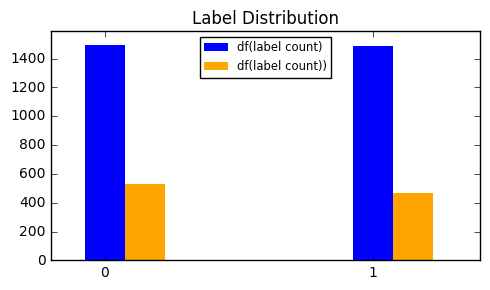

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

category = df.label.unique()
r = np.arange(len(category))
w = 0.15
upper_bound = max(df.label.value_counts())+100

x1 = df.label.value_counts()
x2 = df_sample.label.value_counts()

fig, ax = plt.subplots(figsize = (,3))
rects1 = ax.bar(r-w/2, x1, width=w, color='b',label='df(label count)',linewidth=0)
rects2 = ax.bar(r+w/2, x2, width=w, color='orange', label='df(label count))',linewidth=0)


ax.set_title('Label Distribution')
plt.xticks(r,x1.index)
plt.ylim((0,upper_bound))
ax.legend(loc='upper center',fontsize='small')



fig.tight_layout()

### 2.4 Feature Engineering
The remaining values are unique, it's meaningless to build a model like this. Therefore, must create **unigram** as features for futher classification task. 

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abcd2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# create Unigram
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df["unigrams"].head()

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
4    [The, best, scene, in, the, movie, was, when, ...
Name: unigrams, dtype: object

In [11]:
#The dataframe after adding unigrams
df.head()

,sentence,label,source,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,imdb_labelled.txt,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,imdb_labelled.txt,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,imdb_labelled.txt,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,imdb_labelled.txt,"[Very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,1,imdb_labelled.txt,"[The, best, scene, in, the, movie, was, when, ..."


In [12]:
#Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix

#Feature name mapping
feature_names = count_vect.get_feature_names()

print('The first sentence: "%s"' %df.sentence[0])
print(df_counts[0])

The first sentence: "A very, very, very slow-moving, aimless movie about a distressed, drifting young man."
  (0, 4890)	3
  (0, 4133)	1
  (0, 2956)	1
  (0, 166)	1
  (0, 2954)	1
  (0, 75)	1
  (0, 1331)	1
  (0, 1401)	1
  (0, 5139)	1
  (0, 2764)	1


In [13]:
#Examine the result after applying CountVectorizer
print('For examination:\n')
print('The #4890 feature is: "%s"' %feature_names[4890])
print('The #4133 feature is: "%s"\n' %feature_names[4133])
print('Match the the word freqency of the original sentence!')

For examination:

The #4890 feature is: "very"
The #4133 feature is: "slow"

Match the the word freqency of the original sentence!


In [14]:
#Shape of new dataframe
df_counts.shape

(2983, 5155)

In [15]:
#organize as dataframe type
df_counts = pd.DataFrame(df_counts.toarray(), columns=feature_names)
df_counts.head()

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.5 Visualization for unigram
Making term-document matrix by sorting most frequent terms

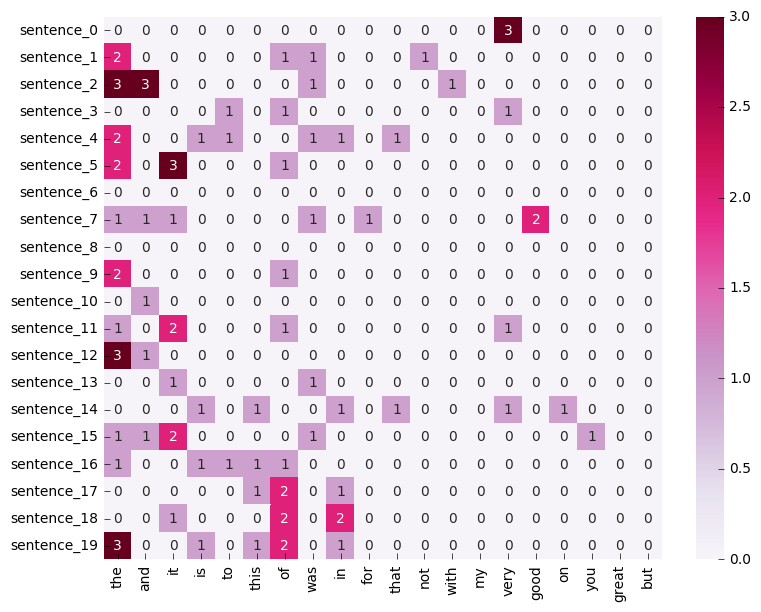

In [16]:
plot_x = ["term_"+str(i) for i in feature_names[0:20]]
plot_y = ["sentence_"+ str(i) for i in list(df.index)[0:20]]
plot_z = np.array(df_counts.iloc[:20,:20])

import seaborn as sns

colsum = df_counts.sum(axis=0).sort_values(ascending=False).index
df_count_sample = df_counts[colsum[:20]][:20]
df_count_sample.index=plot_y
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_count_sample,cmap="PuRd",annot=True)

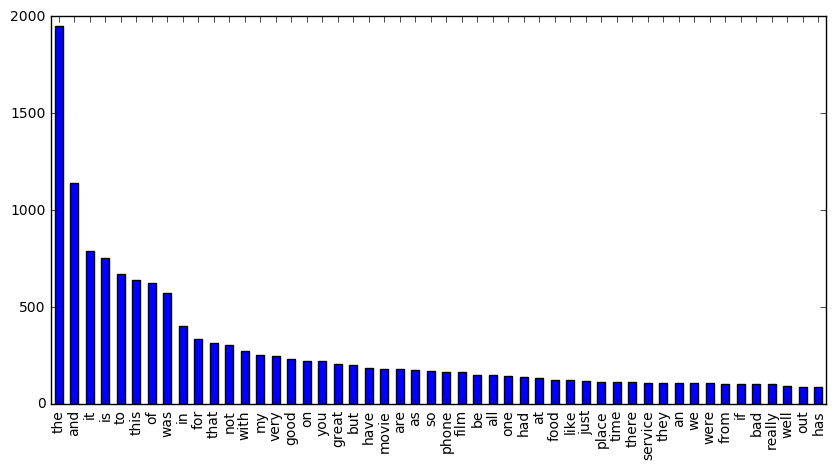

In [19]:
#Top 50 freqent term
colsum_freq_sort = df_counts.sum(axis=0).sort_values(ascending=False)
plt.subplots(figsize=(10, 5))
colsum_freq_sort[:50].plot(kind="bar")

### 2.6 Discretization and Binarization
Since only two class, the binarization expression is simple.

In [22]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.label)
df['bin_label'] = mlb.transform(df['label']).tolist()
df.head()

,sentence,label,source,unigrams,bin_label
0,"A very, very, very slow-moving, aimless movie ...",0,imdb_labelled.txt,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",[0]
1,Not sure who was more lost - the flat characte...,0,imdb_labelled.txt,"[Not, sure, who, was, more, lost, -, the, flat...",[0]
2,Attempting artiness with black & white and cle...,0,imdb_labelled.txt,"[Attempting, artiness, with, black, &, white, ...",[0]
3,Very little music or anything to speak of.,0,imdb_labelled.txt,"[Very, little, music, or, anything, to, speak,...",[0]
4,The best scene in the movie was when Gerardo i...,1,imdb_labelled.txt,"[The, best, scene, in, the, movie, was, when, ...",[1]


### 2.7 Dimensionality Reduction by PCA
Use PCA to effectively reduce feature dimensions.

In [25]:
#Project to 2D
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 2).fit_transform(df_counts)


TypeError: 'Figure' object is not iterable

In [30]:
df.head()

,sentence,label,source,unigrams,bin_label
0,"A very, very, very slow-moving, aimless movie ...",0,imdb_labelled.txt,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",[0]
1,Not sure who was more lost - the flat characte...,0,imdb_labelled.txt,"[Not, sure, who, was, more, lost, -, the, flat...",[0]
2,Attempting artiness with black & white and cle...,0,imdb_labelled.txt,"[Attempting, artiness, with, black, &, white, ...",[0]
3,Very little music or anything to speak of.,0,imdb_labelled.txt,"[Very, little, music, or, anything, to, speak,...",[0]
4,The best scene in the movie was when Gerardo i...,1,imdb_labelled.txt,"[The, best, scene, in, the, movie, was, when, ...",[1]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


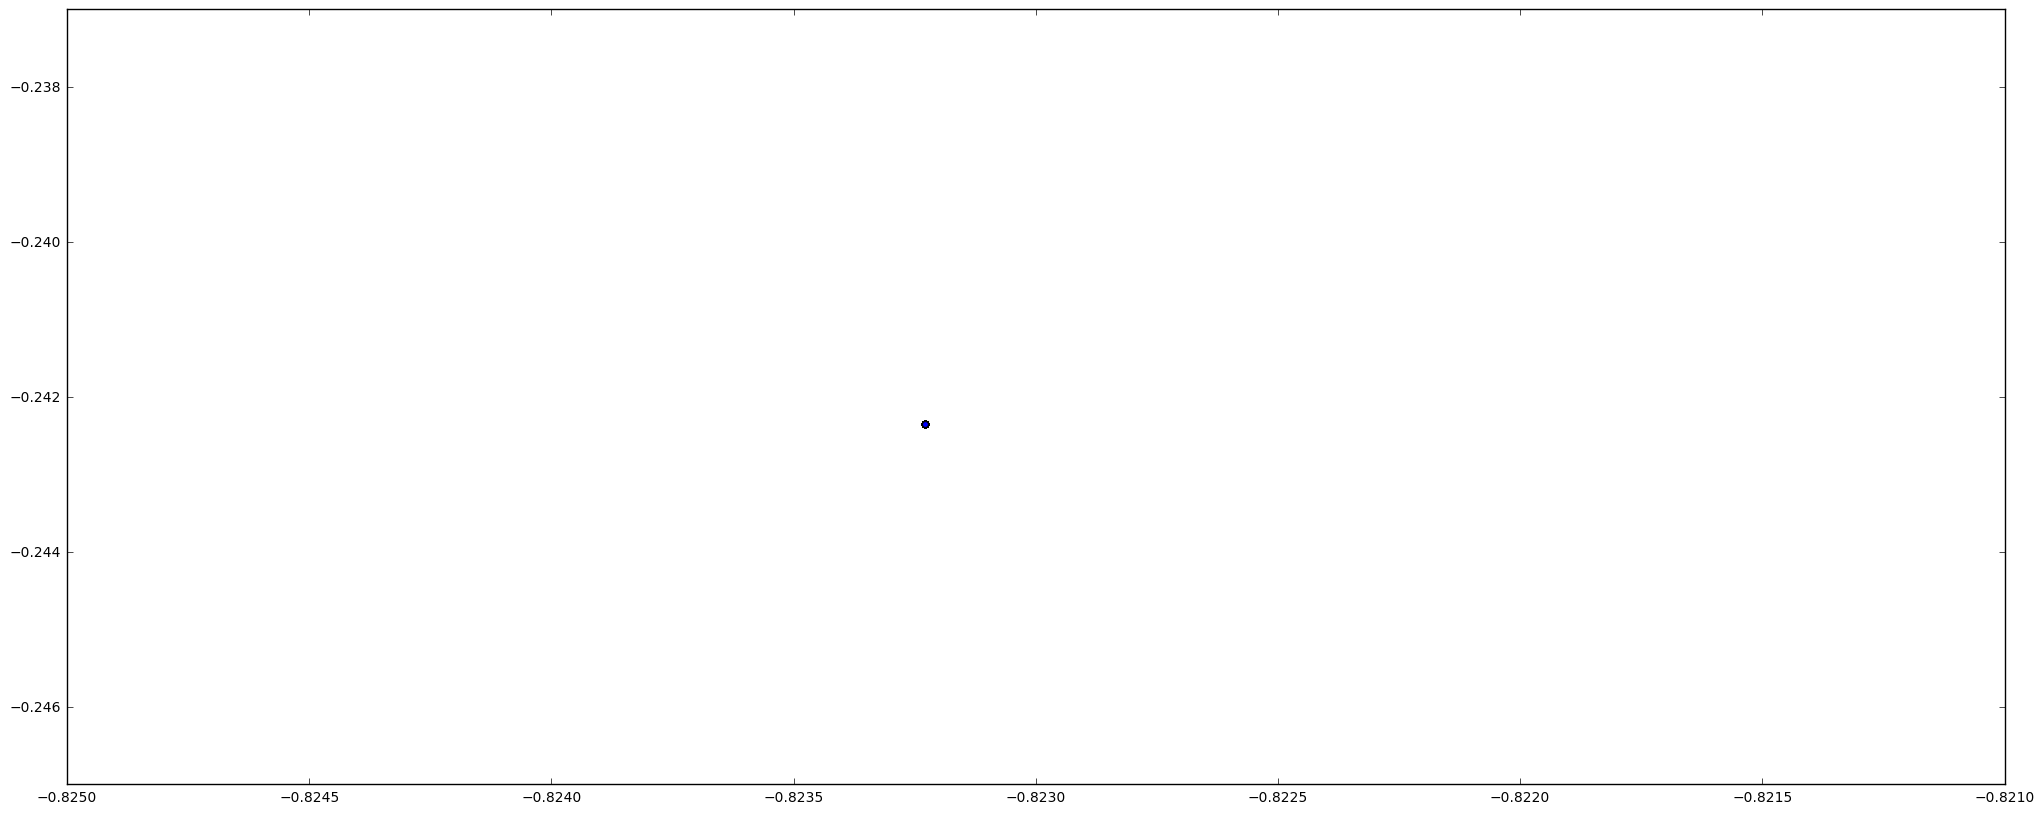

In [34]:
col = ['coral', 'blue']

# plot
ax, fig = plt.subplots(figsize = (25,10))

for c, l in zip(col, [0,1]):
    xs = df_reduced[df['label'] == l].T[0]
    ys = df_reduced[df['label'] == l].T[1]
   
    plt.scatter(xs, ys, c = c, marker='o')

#ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
#ax.set_xlabel('\nX Label')
#ax.set_ylabel('\nY Label')

plt.show()

### 2.8 Data Exploration

Random sample sentence and calculate cosine similarity. 

In [85]:
# We retrieve 3 sentences for a random record
maxlen = df.shape[0]
document_to_transform_1 = []

#rand1 = np.random.randint(0,maxlen)
#rand2 = np.random.randint(0,maxlen)
#rand3 = np.random.randint(0,maxlen)

#The number is randomly draw. However, fix for later explaination. 
rand1 = 2193
rand2 = 2372
rand3 = 446

random_record_1 = df.iloc[rand1]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[rand2]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[rand3]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The color is even prettier than I thought it would be, and the graphics are incredibly sharp.']
['Great Hands Free Device.']
['I believe the screenwriter did a good job of tying up the loose ends.']


In [86]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]]


In [87]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.251976
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


Recap the senetence:
1. ['The color is even prettier than I thought it would be, and the graphics are incredibly sharp.']
2. ['Great Hands Free Device.']
3. ['I believe the screenwriter did a good job of tying up the loose ends.']

S1 abd S3 have few words overlap, S2 doen't includes any term overlap with others. The scores do refelct that.
However, the overlapping words are "I" and "the". These two word are very neutral and frequently used. Seems not so helpful to the sentiment classification task.

# Section3
Tasks on the new dataset:
- Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
- Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .
- Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

### 3.1 New Visualization

### 3.2 TF-IDF features

### 3.3 Simple Naive Bayes classifier

# Section4
Suggestions for improvement

### 4.1  Feature matrix is too sparse

### 4.2  Scoring bias